## CMPING 2110 Spring 2022 - Week 01

### Explore the UCI Machine Learning Repository -- Airfoil data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Data

The data come from the UCI machine learning repository.

https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise

In [2]:
file_path = 'airfoil_self_noise.dat'

In [8]:
df0 = pd.read_csv( file_path, header=None, sep='\t' )

In [9]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1503 non-null   int64  
 1   1       1503 non-null   float64
 2   2       1503 non-null   float64
 3   3       1503 non-null   float64
 4   4       1503 non-null   float64
 5   5       1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [10]:
df0.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


We can define the variable names ourselves.

In [11]:
var_names = ['frequency', 'aoa', 'chord', 'velocity', 'displacement', 'decibels']

In [13]:
df1 = pd.read_csv( file_path, header=None, names=var_names, sep='\t' )

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   frequency     1503 non-null   int64  
 1   aoa           1503 non-null   float64
 2   chord         1503 non-null   float64
 3   velocity      1503 non-null   float64
 4   displacement  1503 non-null   float64
 5   decibels      1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


Or...we could read in from the UCI machine learning repo directly...

In [15]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'

In [16]:
airfoil_df = pd.read_csv( data_url, header=None, names=var_names, sep='\t' )

In [17]:
airfoil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   frequency     1503 non-null   int64  
 1   aoa           1503 non-null   float64
 2   chord         1503 non-null   float64
 3   velocity      1503 non-null   float64
 4   displacement  1503 non-null   float64
 5   decibels      1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


## Wide-Format

In [18]:
airfoil_df

,frequency,aoa,chord,velocity,displacement,decibels
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


## Long-Format

The `.melt()` method lets us convert from wide to long. First add in a column for the unique `index` that defines the row.

In [19]:
airfoil_df.reset_index()

,index,frequency,aoa,chord,velocity,displacement,decibels
0,0,800,0.0,0.3048,71.3,0.002663,126.201
1,1,1000,0.0,0.3048,71.3,0.002663,125.201
2,2,1250,0.0,0.3048,71.3,0.002663,125.951
3,3,1600,0.0,0.3048,71.3,0.002663,127.591
4,4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...,...
1498,1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [20]:
airfoil_df.reset_index().copy().melt(id_vars=['index'], value_vars=var_names)

,index,variable,value
0,0,frequency,800.000
1,1,frequency,1000.000
2,2,frequency,1250.000
3,3,frequency,1600.000
4,4,frequency,2000.000
...,...,...,...
9013,1498,decibels,110.264
9014,1499,decibels,109.254
9015,1500,decibels,106.604
9016,1501,decibels,106.224


In [21]:
1503 * 6

9018

In [22]:
airfoil_lf = airfoil_df.reset_index().copy().melt(id_vars=['index'], value_vars=var_names)

In [23]:
airfoil_lf.loc[ airfoil_lf['index'] == 1, :]

,index,variable,value
1,1,frequency,1000.000000
1504,1,aoa,0.000000
3007,1,chord,0.304800
4510,1,velocity,71.300000
6013,1,displacement,0.002663
7516,1,decibels,125.201000


In [24]:
airfoil_df.head()

,frequency,aoa,chord,velocity,displacement,decibels
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


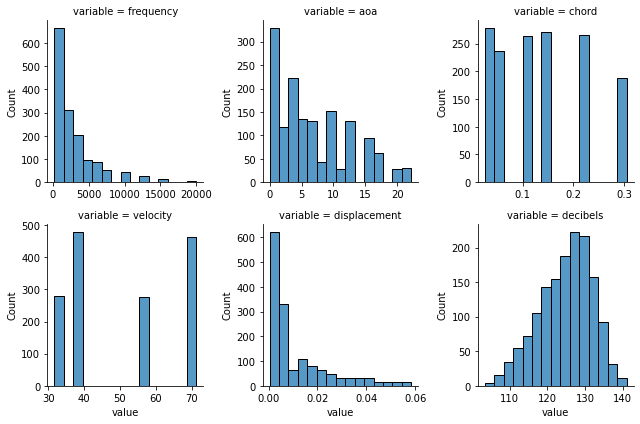

In [25]:
g = sns.FacetGrid(data = airfoil_lf, col='variable', col_wrap=3, sharex=False, sharey=False)

g.map_dataframe(sns.histplot, x='value', bins=15)

plt.show()

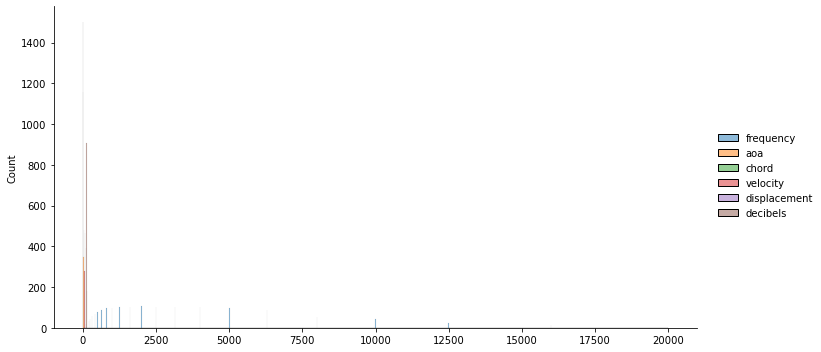

In [26]:
sns.displot(data = airfoil_df, kind='hist', aspect=2)

plt.show()